In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
%matplotlib inline

In [73]:
df = pd.read_csv('telco.csv')

In [74]:
print("Dataset info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

Dataset info:
Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [75]:
total_customers = len(df)
churned_customers = df['Churn'].sum()
churn_rate = (churned_customers / total_customers) * 100

print(f"\nOverall Churn Rate: {churn_rate:.2f}%")
print(f"Churned customers: {churned_customers}")
print(f"Total customers: {total_customers}")


Overall Churn Rate: 26.58%
Churned customers: 1869
Total customers: 7032


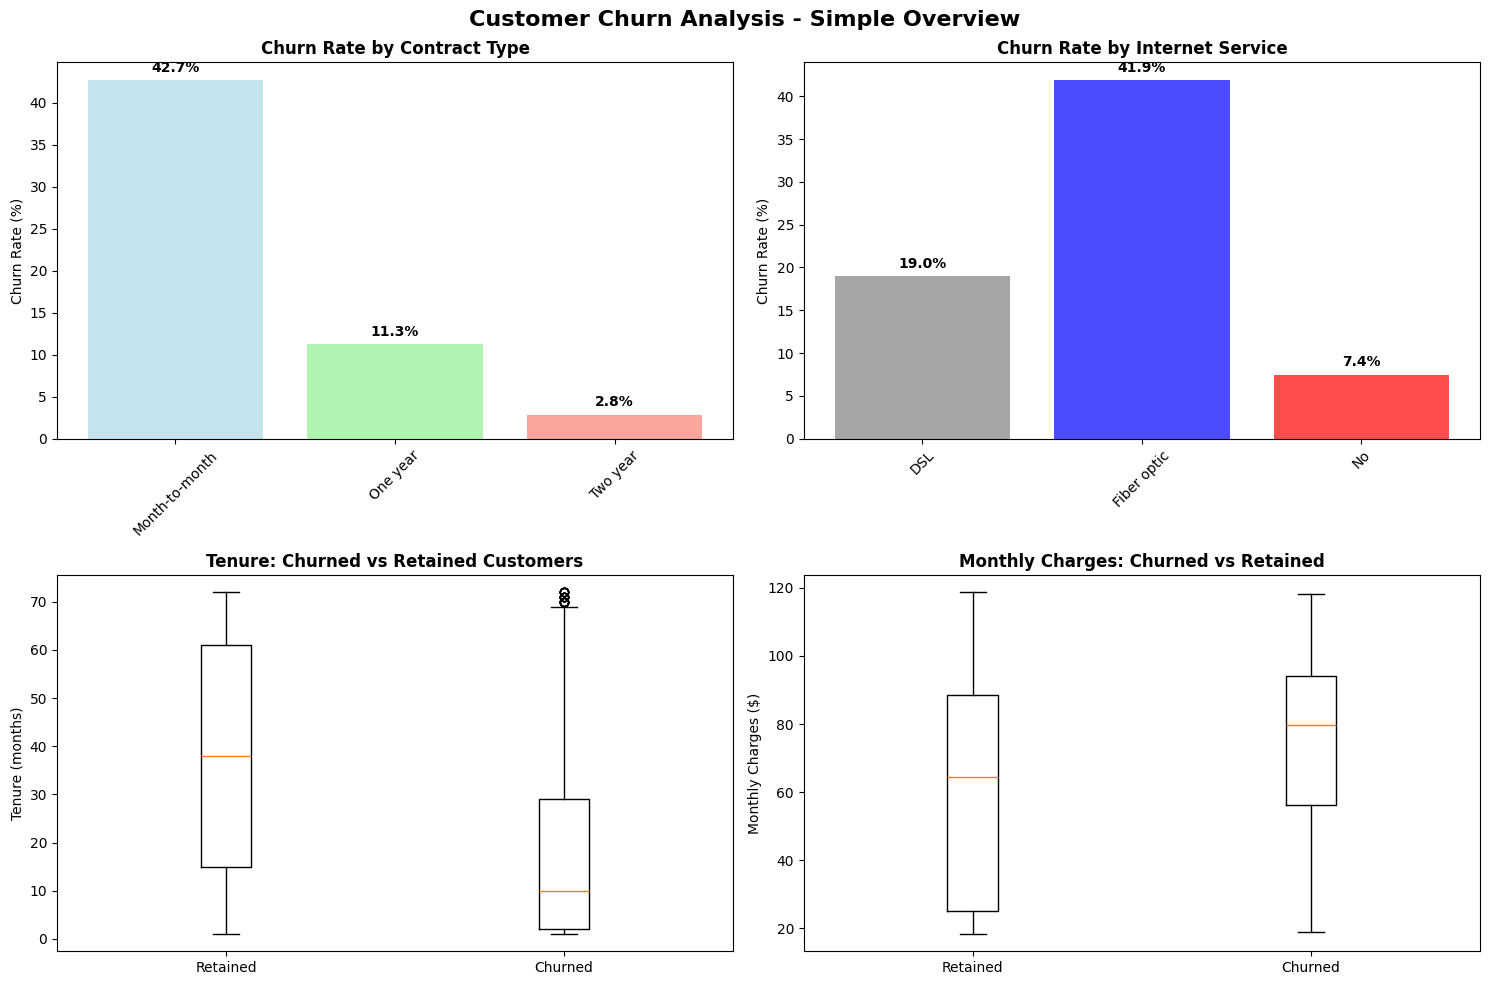

In [76]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Customer Churn Analysis - Simple Overview', fontsize=16, fontweight='bold')

contract_churn = df.groupby('Contract')['Churn'].mean() * 100
colors = ['lightblue', 'lightgreen', 'salmon']
ax1.bar(contract_churn.index, contract_churn.values, color=colors, alpha=0.7)
ax1.set_title('Churn Rate by Contract Type', fontweight='bold')
ax1.set_ylabel('Churn Rate (%)')
ax1.tick_params(axis='x', rotation=45)

for i, v in enumerate(contract_churn.values):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

internet_churn = df.groupby('InternetService')['Churn'].mean() * 100
ax2.bar(internet_churn.index, internet_churn.values, color=['gray', 'blue', 'red'], alpha=0.7)
ax2.set_title('Churn Rate by Internet Service', fontweight='bold')
ax2.set_ylabel('Churn Rate (%)')
ax2.tick_params(axis='x', rotation=45)

for i, v in enumerate(internet_churn.values):
    ax2.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

ax3.boxplot([df[df['Churn']==0]['tenure'], df[df['Churn']==1]['tenure']])
ax3.set_title('Tenure: Churned vs Retained Customers', fontweight='bold')
ax3.set_xticklabels(['Retained', 'Churned'])
ax3.set_ylabel('Tenure (months)')

ax4.boxplot([df[df['Churn']==0]['MonthlyCharges'], df[df['Churn']==1]['MonthlyCharges']])
ax4.set_title('Monthly Charges: Churned vs Retained', fontweight='bold')
ax4.set_xticklabels(['Retained', 'Churned'])
ax4.set_ylabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

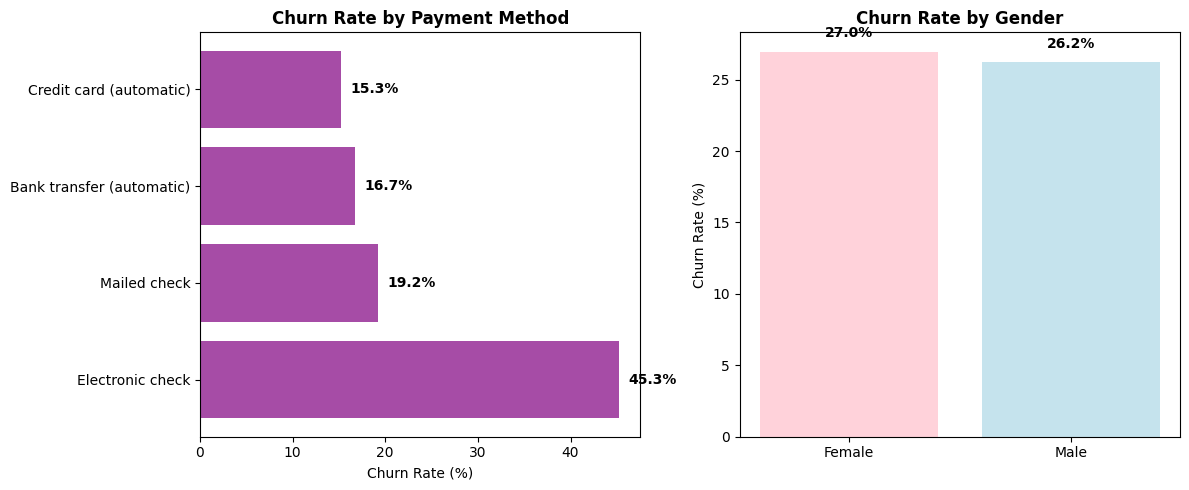

In [77]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
payment_churn = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False) * 100
plt.barh(payment_churn.index, payment_churn.values, color='purple', alpha=0.7)
plt.title('Churn Rate by Payment Method', fontweight='bold')
plt.xlabel('Churn Rate (%)')

for i, v in enumerate(payment_churn.values):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.subplot(1, 2, 2)
gender_churn = df.groupby('gender')['Churn'].mean() * 100
plt.bar(gender_churn.index, gender_churn.values, color=['pink', 'lightblue'], alpha=0.7)
plt.title('Churn Rate by Gender', fontweight='bold')
plt.ylabel('Churn Rate (%)')

for i, v in enumerate(gender_churn.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

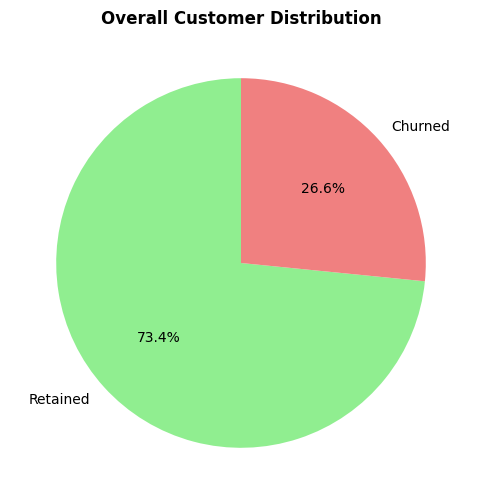

In [78]:
plt.figure(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
colors = ['lightgreen', 'lightcoral']
plt.pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Overall Customer Distribution', fontweight='bold')
plt.show()

In [79]:
print("\n" + "="*50)
print("KEY METRICS SUMMARY")
print("="*50)

print(f"\nOverall Churn Rate: {churn_rate:.2f}%")

print(f"\nTop Factors Influencing Churn:")
print(f"1. Contract Type:")
for contract, rate in contract_churn.items():
    print(f"   - {contract}: {rate:.1f}%")

print(f"\n2. Internet Service:")
for service, rate in internet_churn.items():
    print(f"   - {service}: {rate:.1f}%")

print(f"\n3. Payment Method (Top 2):")
top_payments = payment_churn.head(2)
for payment, rate in top_payments.items():
    print(f"   - {payment}: {rate:.1f}%")

print(f"\nBasic Statistics:")
print(f"Average tenure of retained customers: {df[df['Churn']==0]['tenure'].mean():.1f} months")
print(f"Average tenure of churned customers: {df[df['Churn']==1]['tenure'].mean():.1f} months")
print(f"Average monthly charges of retained: ${df[df['Churn']==0]['MonthlyCharges'].mean():.2f}")
print(f"Average monthly charges of churned: ${df[df['Churn']==1]['MonthlyCharges'].mean():.2f}")

print("\n" + "="*50)
print("SIMPLE RECOMMENDATIONS")
print("="*50)
print("1. Focus on month-to-month contract customers")
print("2. Review fiber optic service quality/pricing")
print("3. Encourage automated payment methods")
print("4. Pay attention to customers with shorter tenure")
print("5. Monitor customers with higher monthly charges")


KEY METRICS SUMMARY

Overall Churn Rate: 26.58%

Top Factors Influencing Churn:
1. Contract Type:
   - Month-to-month: 42.7%
   - One year: 11.3%
   - Two year: 2.8%

2. Internet Service:
   - DSL: 19.0%
   - Fiber optic: 41.9%
   - No: 7.4%

3. Payment Method (Top 2):
   - Electronic check: 45.3%
   - Mailed check: 19.2%

Basic Statistics:
Average tenure of retained customers: 37.7 months
Average tenure of churned customers: 18.0 months
Average monthly charges of retained: $61.31
Average monthly charges of churned: $74.44

SIMPLE RECOMMENDATIONS
1. Focus on month-to-month contract customers
2. Review fiber optic service quality/pricing
3. Encourage automated payment methods
4. Pay attention to customers with shorter tenure
5. Monitor customers with higher monthly charges
